Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.2788 - loss: 5.7288 - val_accuracy: 0.6710 - val_loss: 1.0320
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6027 - loss: 1.1322 - val_accuracy: 0.7833 - val_loss: 0.6183
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7269 - loss: 0.7836 - val_accuracy: 0.7978 - val_loss: 0.5635
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7520 - loss: 0.6590 - val_accuracy: 0.8116 - val_loss: 0.4860
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.7969 - loss: 0.5691 - val_accuracy: 0.8304 - val_loss: 0.4293
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.8344 - loss: 0.4744 - val_accuracy: 0.8391 - val_loss: 0.3971
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.8467 - loss: 0.3999 - val_accuracy: 0.8725 - val_loss: 0.3514
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8712 - loss: 0.3338 - 

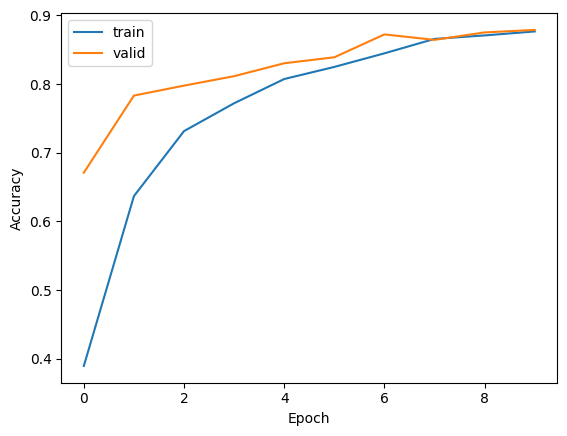

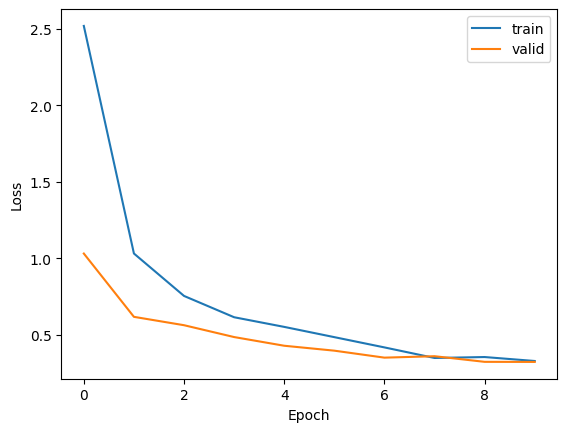

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8666 - loss: 0.3415
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [12]:
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input

dataDirectory = "/kaggle/input/natural-images/natural_images/"

data = []
labels = []

for label in os.listdir(dataDirectory):
    path = "/kaggle/input/natural-images/natural_images/{0}/".format(label)
    folderData = os.listdir(path)
    for imagePath in folderData:
        img = cv2.imread(path + imagePath)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(label)
        
data = np.array(data)
labels = np.array(labels)
data.shape, labels.shape
labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(labels)
labels = to_categorical(labels)
data.shape, labels.shape

rand = np.arange(len(data))
np.random.shuffle(rand)

data = data[rand]
labels = labels[rand]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), padding="same", activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), padding="same"),
    LeakyReLU(0.001),
    Conv2D(64, (3, 3)),
    LeakyReLU(0.001),
    MaxPool2D((2, 2)),
    
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_split=0.25,
    batch_size=32 
)

history_df = pd.DataFrame(history.history)
history_df.head()

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

